In [164]:
import pandas as pd
import numpy as np

In [165]:
#read the dataset tips.csv
df = pd.read_csv('tips.csv')

In [166]:
df.head()

,total_bill,tip,day
0,16.99,1.01,Sun
1,10.34,1.66,Sun
2,21.01,3.50,Sun
3,23.68,3.31,Sun
4,24.59,3.61,Sun


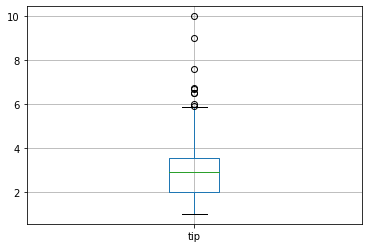

In [167]:
#Using Box-plot visualize the outliers for tip column
df.boxplot(column=['tip'])

In [168]:
#Calculate mean , Standard deviation for tip column
print(df['tip'].mean())
print(df['tip'].std())

2.9982786885245902
1.3836381890011826


In [169]:
#Detect outlier using Z score for tip column
outliers=[]
def detect_outlier(data):
    
    threshold=2
    mean_1 = np.mean(data)
    std_1 = np.std(data)
    
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [170]:
outlier_datapoints = detect_outlier(df['tip'])
outlier_datapoints

[7.58, 6.0, 6.73, 5.85, 6.7, 10.0, 6.5, 9.0, 6.5, 5.92]

In [171]:
#Detect outlier using IQR for column tip

In [172]:
sorted(df['tip'])
q1, q3= np.percentile(df['tip'] ,[25,75])
iqr = q3 - q1
lower_bound_val = q1 - (1.5 *  iqr)
upper_bound_val = q3 + (1.5 * iqr)
outlier_iqr_list=[]
for d in df['tip']:
    if d < lower_bound_val or d > upper_bound_val:
        outlier_iqr_list.append(d)
        
outlier_iqr_list

[7.58, 6.0, 6.73, 6.7, 10.0, 6.5, 9.0, 6.5, 5.92]

In [173]:
#remove outliers from tip column using IQR upper bound and lower bound value
df['tip'] = df[(df.tip < upper_bound_val) & (df.tip > lower_bound_val)]['tip']


In [174]:
df.head()

,total_bill,tip,day
0,16.99,1.01,Sun
1,10.34,1.66,Sun
2,21.01,3.50,Sun
3,23.68,3.31,Sun
4,24.59,3.61,Sun


In [175]:
#Check for the missing values as we have removed outliers
df.isnull().sum()

total_bill    0
tip           9
day           0
dtype: int64

In [176]:
#remove the rows where new_tip is null
df.dropna(inplace=True)

In [177]:
#verify if there are any missing values
df.isnull().sum()

total_bill    0
tip           0
day           0
dtype: int64

In [178]:
df.head()


,total_bill,tip,day
0,16.99,1.01,Sun
1,10.34,1.66,Sun
2,21.01,3.50,Sun
3,23.68,3.31,Sun
4,24.59,3.61,Sun


In [179]:
# Clean the text data
data = ["data cleansing is all about getting rid of the “noise” in the data. \
But your application decides what content within the data is noise, and what is not noise. \
Once you figure out what you need to keep, and what you need to discard from your data, \
then you’ll very certainly have an application which works the way you planned."]

In [180]:
import nltk

In [181]:
#Remove punctuation
import string

nopunc = []
for char in data:
    if char not in string.punctuation:
        nopunc.append(char)

nopunc = ''.join(nopunc)
nopunc


'data cleansing is all about getting rid of the “noise” in the data. But your application decides what content within the data is noise, and what is not noise. Once you figure out what you need to keep, and what you need to discard from your data, then you’ll very certainly have an application which works the way you planned.'

In [182]:
#Tokenize the data
from nltk.tokenize import word_tokenize
tokens = word_tokenize(nopunc)
tokens

['data',
 'cleansing',
 'is',
 'all',
 'about',
 'getting',
 'rid',
 'of',
 'the',
 '“',
 'noise',
 '”',
 'in',
 'the',
 'data',
 '.',
 'But',
 'your',
 'application',
 'decides',
 'what',
 'content',
 'within',
 'the',
 'data',
 'is',
 'noise',
 ',',
 'and',
 'what',
 'is',
 'not',
 'noise',
 '.',
 'Once',
 'you',
 'figure',
 'out',
 'what',
 'you',
 'need',
 'to',
 'keep',
 ',',
 'and',
 'what',
 'you',
 'need',
 'to',
 'discard',
 'from',
 'your',
 'data',
 ',',
 'then',
 'you',
 '’',
 'll',
 'very',
 'certainly',
 'have',
 'an',
 'application',
 'which',
 'works',
 'the',
 'way',
 'you',
 'planned',
 '.']

In [183]:
#Remove Stop words
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
filtered_data=[]
for w in tokens:
    if w not in stop_words:
        filtered_data.append(w)
print(filtered_data)

['data', 'cleansing', 'getting', 'rid', '“', 'noise', '”', 'data', '.', 'But', 'application', 'decides', 'content', 'within', 'data', 'noise', ',', 'noise', '.', 'Once', 'figure', 'need', 'keep', ',', 'need', 'discard', 'data', ',', '’', 'certainly', 'application', 'works', 'way', 'planned', '.']
